<h1 style="text-align: center;"><font color='green'>Prueba 1: Análisis de Sentimientos de Twitter</font></h1>

## <font color='green'>**Contexto**</font>

A continuación se presenta un problema clásico en el análisis de texto: *Extraer la polaridad de sentimiento asociado a un texto*. 

Para esto, utilizaremos una base de datos provenientes de CrowdFlower que se entrega como archivo adjunto para esta prueba bajo el nombre de `training_tweets.csv`. 

Para descargar los datos puede ejecutar el siguiente código:

`https://www.crowdflower.com/wp-content/uploads/2016/07/text_emotion.csv`

El objetivo general de esta prueba es alcanzar el mejor desempeño posible para clasificar si un tweet tiene una polaridad positiva o negativa en cuanto al sentimiento que expresa.

Para medir el desempeño, se evaluará con un conjunto de datos del cuál no tendrán acceso. De esta manera evitaremos que los modelos aprendan información sobre el conjunto de validación.

## <font color='green'>**Consideraciones**</font>
Nos interesa trabajar con dos tipos de emociones: positivas o negativas. Para ello deberá generar la recodificación de cada una de las clases en una de las dos emociones:

| Original | Recodificación |
|-----:|------------|
| worry | Negativa |
| happiness | Positiva |
| sadness | Negativa |
| love | Positiva |
| surprise | Positiva |
| fun | Positiva |
| relief | Positiva |
| hate | Negativa |
| empty | Negativa |
| enthusiasm | Positiva |
| boredom | Negativa |
| anger | Negativa |

Si el tweet está asignado como neutral, clasifíquelo aleatoriamente entre positivo o negativo.

## <font color='green'>**Hito 1:**</font>

#### **<font color='green'>Entendimiento del problema</font>**

El análisis de sentimientos en Twiter es un problema del campo de la clasificación, existe abundante evidencia en la literatura que busca dar respuesta a este problema.

En concreto el desafío consiste en generar una clasificación binaria de los Twits, determinando si estos son positivos o negativos, dado que no existe interés en identificar algún sentimeinto por sobre otro, nuestra métrica de desempeño será `f1-score`, ponderando así el resultado de Precisión y Recall considerando así un eventual desequilibrio entre las clases.

Para poder realizar el análisis, es necesario importar algunas librerias clásicas con las que trabajaremos, por ejemplo:
- Se importarán librerias de manipulación de datos como `pandas==1.1.5` y `numpy==1.19.5`
- librerías para realizar visualizaciones como `matplotlib==3.3.4` y `seaborn==0.11.2`
- librerías relacionadas con el modelamiento como `scikit-learn==0.24.2` junto con las métricas asociadas a la clasificación y separación de datos; y funciones asociadas a NLP como `CountVectorizer`

#### **<font color='green'>Propuesta metodológica</font>**

Para realizar el análisis, se procederá con la siguiente metodología de trabajo:

El trabajo comenzará con un análisis exploratorio será el análisis de datos perdidos, luego con un análisis exploratorio de los datos, identificando la estructura y extensión de la base de datos, la frecuencia de palabras, identificando aquellas más utilizadas en nuestro conjunto de tweets, analizaremos la extensión de carácteres de los tweets, el trabajo exploratorio también analizará la composición de la variable dependiente previo a su agrupación

El trabajo continuará con el preprocesamiento de los datos, lo cual nos permitirá limpiar y estructurar la base de datos de manera tal que podamos trabajar en ella, bajo las configuraciones exigidas por los algoritmos. En general algunas de las técnicas más habituales para los trabajos de procesamiento de lenguaje natural (NLP) son identificación de stopwords, procesos de Lematización, stemming y tokenización. En el desarrollo de este trabajo implmentaremos algunas de estas técnicas con la finalidad de aumentar la precisión de nuestros mododel. El trabajo continuará con la recodificación de los atributos de nuestra variable dependiente, para lo cual recodificaremos los distintos atributos que toma la variable sentimiento, con la finalidad de reducirlo a positivo o negativo, posteriormente esta columna será binarizada para poder trabajar con los modelos, de igual manera se eliminará la columna del ID del Twit junto con el autor de este, dado que esto no genera valor para nuestros modelos.

Finalmante con la data depurada, comenzaremos a desarrollar cada uno nuestros modelos,  posteriormente comparar sus resultados y definiremos los dos más efectivos en la identificación de los sentimientos de los tweets.

Como nos encontramos frente a un problema de clasificación, debemos ocupar métricas que estén asociadas a problemas de clasificación. Ahora, dependiendo que tan balanceado estén las categorías de nuestro target, es que ocuparemos diferentes métricas para evaluar nuestro modelo y predicciones (Todas estas métricas se obtendrán de la librería `sklearn`):
- Si nuestra variable objetivo no presenta problemas de desbalanceo, ocuparemos las siguientes métricas:
    - `accuracy` 
    - `precision`
    - `curva ROC y AUC`
- Si nuestra variable objetivo presenta problemas de desbalanceo, ocuparemos las siguientes métricas
    - `precision`
    - `recall`
    - `f1-score`

#### **<font color='green'>Modelos y grillas a implementar</font>**

Por lo mencionado en los enunciado, debemos realizar al menos 5 modelos para la predicción de los sentimientos. Dado que nos encontramos ante un problema de clasificación, proponemos los siguientes modelos a implementar:

- `LogisticRegression`: 
    - *penalty*: l1, l2, elasticnet, None
    - *C*: [0.01, 1, 100]
- `MultinomialNB`: 
    - *alpha*: [0.0001, 0.1, 10]
- `RandomForestClassifier`:
    - *max_features*: None, log2, sqrt
    - *n_estimators*: Evaluar entre 20 y 1000 en pasos de 50
- `SVC`:
    - *C*: [0.001, 0.01, 0.1, 1, 10, 100, 1000]
    - *gamma*: [0.0001, 0.001, 0.01, 0.1, 1, 10]
    - *cv*: 10
- `GradientBoostingClassifier`:
    - *learning_rate*: [0.01, 0.1, 0.5],
    - *n_estimators*: [50, 100, 500, 1000, 2000],
    - *subsample*: [0.1,0.5,0.9]

además, en caso de ameritarlo, se ocupará el parámetro `class_weight` si tenemos nuestro dataset desbalanceado.

#### **<font color='green'>Estudio del vector objetivo</font>**

Para el estudio de la variable objetivo, primero cargaremos las librerias necesarias y el dataset. Despues nos centraremos en el analisis de la variable `sentiment` que es nuestro vector objetivo que posteriormente debemos convertirla en una variable binaria 0 y 1:

In [1]:
# Importamos las librerías clasicas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import warnings
from funciones import porcentaje_null

# Para filtrar los warnings
warnings.filterwarnings('ignore')

# Cargamos los datos de entrenamiento y de test
df = pd.read_csv('training_tweets.csv').drop(columns='Unnamed: 0')
df

,content,sentiment
0,Happy Mama's day to all mothers,love
1,@LysdelTellez I am lost. Please help me find a...,worry
2,"@BoomKatt yes yes I AM, networking whore to th...",happiness
3,you@snapplynn Wish that would have been your t...,neutral
4,now i am doing the MicroEconomics project iha...,worry
...,...,...
29995,I do not want to work tomorrow!,sadness
29996,@KandyBee we shuld do a dance like that its s...,fun
29997,"Photo: Got my prints a few days ago, ready for...",happiness
29998,@tove_liden Thanks for the follow Tove!,fun


neutral       0.215033
worry         0.211233
happiness     0.131733
sadness       0.128967
love          0.096933
surprise      0.053967
fun           0.044367
relief        0.038600
hate          0.032500
empty         0.020567
enthusiasm    0.018633
boredom       0.004500
anger         0.002967
Name: sentiment, dtype: float64

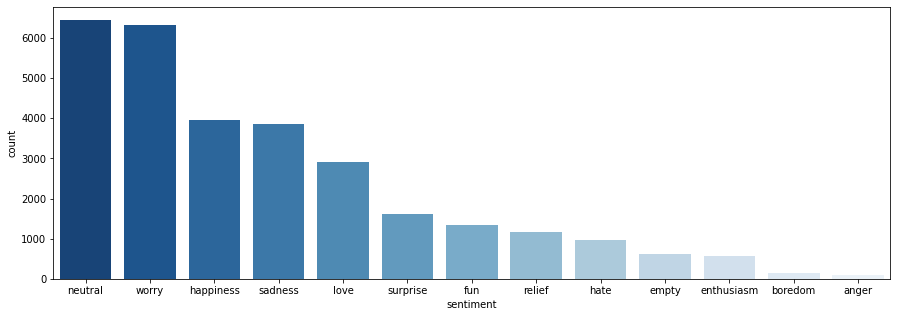

In [2]:
# Revisamos la distribución de la variable objetivo

plt.figure(figsize=(15,5))

# Graficamos la cantidad de datos por categoria
sns.countplot(data=df, x='sentiment', palette = 'Blues_r', order = df['sentiment'].value_counts().index)

# Revisamos la proporcion entre estas categorias
df['sentiment'].value_counts(normalize=True)

Observamos que el sentimiento más frecuente es el `neutral`, lo cual no es ni un sentimiento positivo ni negativo, en segundo lugar vemos que practicamente con la misma frecuencia se encuentra el sentimiento `worry`, el cual es un sentimiento negativo, por ultimo, en el 3er lugar se encuentra el sentimiento `happiness` el cual es un sentimiento positivo.

#### **<font color='green'>Estudio de datos nulos</font>**

Para ver la cantidad de nulos en el dataset, llamaremos a la función creada llamada `porcentaje_null` la cual reporta la cantidad del datos perdidos por columna y el porcentaje que representa

In [3]:
porcentaje_null(df)

           N_NaN  Porcentaje
content        0         0.0
sentiment      0         0.0


Claramente, no hay registros nulos en nuestro set de datos, por lo que no es necesario eliminar ni filas ni columnas ni reemplazar estos valores.

#### **<font color='green'>Recodificación del vector objetivo</font>**

Como nos encontramos en un problema de clasificación binaria, debemos recodificar las variables como sentimineto `positivo` o `negativo`, por lo cual, con la lista entregada en el desafio, realizamos el reemplazo segun corresponda para cada palabra:

In [4]:
# Procedemos a realizar la recodificación de la variable objetivo sentiment

# Listamos los sentimientos que corresponden a emociones negativas o positivas
negativa = ["worry","sadness","hate","empty","boredom","anger"]
positiva = ["happiness","love","surprise","fun","relief","enthusiasm"]

# Sustituimos dichos sentimientos
df['sentiment'] = df['sentiment'].replace(negativa,'negativa')
df['sentiment'] = df['sentiment'].replace(positiva,'positiva')

# Mostramos la distribución sin randomizar los sentimientos nuetros
df['sentiment'].value_counts()

negativa    12022
positiva    11527
neutral      6451
Name: sentiment, dtype: int64

In [5]:
# Para las emociones neutras, las clasificamos de forma aleatoria

random.seed(13)
df['sentiment'] = df['sentiment'].apply(lambda x: x.replace('neutral',random.choice(['positiva','negativa'])))

# Mostramos como quedó la distribución de esta
df['sentiment'].value_counts()

negativa    15200
positiva    14800
Name: sentiment, dtype: int64

Al realizar la recodificación, vemos como quedo bastante equilibrado nuestra variable objetivo ya que practicamente tienen la misma proporción. Por último, le damos la recodificación adecuada dejandola con los valores 1 y 0 para valores positivos y negativos respectivamente.

In [6]:
# Recodificamos en 0 y 1

df['sentiment'] = df['sentiment'].replace(['positiva','negativa'],[1,0])
df['sentiment'].value_counts()

0    15200
1    14800
Name: sentiment, dtype: int64